<b><font size="6"><u>Model Evaluation and Comparison</u></font></b>

In this notebook we are going to see how to perform Model Selection.

We can define **Model Selection** as the process of estimating performances of different models to choose the best one (the one that produces the minimum of the test error).<br>
The process of **Model Assessment** is when, having chosen a model, we estimate the prediction error on new data.<br>

<div>
<img src="https://drive.google.com/uc?id=11gJoU-VX8RXy92_lOCpoT5I1Tbb9ezy1" width="300"/> <img name="crispdm.png">
</div>



# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>

* [1 - Initial Steps](#first-bullet)
    * [1.1 - Connect to Google Colab](#first-bullet)
    * [1.2 - Importing Libraries and Data](#import)
    * [1.3 - Split the Data](#split)
* [2 - Overfitting](#overfitting)
* [3 - Cross-Validation](#cross-val)
* [4 - Performance Metrics](#metrics)
    * [4.1 - Classification Problems](#class)
        * [4.1.1 - Classification Model](#classmodel)
        * [4.1.2 - Metrics for Classification Problems](#classmodelmetrics)
    * [4.2 - Regression Problems](#reg)
        * [4.2.1 - Regression Model](#regmodel)
        * [4.2.2 - Metrics for Regression Problems](#regmodelmetrics)
* [5 - Data Leakage](#leak)

<font color='#BFD72F'> Supervised versus Unsupervised Methods</font>
<font size="1">Daniel T. Larose, Chantal D. Larose (2015) “Data Mining and Predictive Analytics,” 2nd Edition, Wiley (pp. 160-161)</font>

Data mining methods may be categorized as either supervised or unsupervised. In **unsupervised methods**, no target variable is identified as such. Instead, the data mining algorithm searches for patterns and structures among all the variables. The most common unsupervised data mining method is clustering.

Most data mining methods are **supervised methods**, however, meaning that there is a particular prespecified target variable, and that the algorithm is given many examples where the value of the target variable is provided, so that the algorithm may learn which values of the target variable are associated with which values of the predictor variables. For example, regression methods are supervised methods.

<font color='#BFD72F'>Note:</font> The terms *supervised* and *unsupervised* are widespread in the literature. However, it is not correct to imply that unsupervised methods require no human involvement. To the contrary, effective cluster analysis and
association rule mining both require substantial human judgment and skill.

<div>
<img src="https://drive.google.com/uc?id=1PCRs1VHXDzsm4g795CvePv9EPOymi30B" width="800"/> <img name="supervised_vs_unsupervised.png">
</div>



If you wish to explore this difference further, check this <a href="https://www.ibm.com/think/topics/supervised-vs-unsupervised-learning"> link</a>.


# <font color='#BFD72F'>1. Initial Steps</font> <a class="anchor" id="first-bullet"></a>

## <font color='#BFD72F'>1.1. Connect to Google Colab</font> <a class="anchor" id="colab"></a>

[Back to Contents](#toc)

**Step 1 -** Connect the google colab notebook with your google drive. Before running the code below, make sure you have this notebook in the folders mentioned in the variable `path`.<br>

In [70]:
# Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DM2/LAB02 - Feature Selection and Model Evaluation/'

Mounted at /content/drive


## <font color='#BFD72F'>1.2. Importing Libraries and Data</font> <a class="anchor" id="import"></a>
[Back to Contents](#toc)

**Step 2 -** Import the needed libraries.

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, f1_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

import warnings
warnings.filterwarnings("ignore")

**Step 3 -** Import the data that is going to be used into `pandas` dataframes.

**Step 3.1 -** Import and check the Boston dataset.

In [72]:
# numerical input, numerical output
boston = pd.read_csv(path + 'data/Boston.csv')
boston.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


<font color='orange'>____GOAL____:   </font> Predict the prices of houses using the given features.

`CRIM`: Per capita crime rate by town <br>
`ZN`: Proportion of residential land zoned for lots over 25,000 sq. ft<br>
`INDUS`: Proportion of non-retail business acres per town<br>
`CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
`NOX`: Nitric oxide concentration (parts per 10 million)<br>
`RM`: Average number of rooms per dwelling<br>
`AGE`: Proportion of owner-occupied units built prior to 1940<br>
`DIS`: Weighted distances to five Boston employment centers<br>
`RAD`: Index of accessibility to radial highways<br>
`TAX`: Full-value property tax rate per 10,000 dollars<br>
`PTRATIO`: Pupil-teacher ratio by town<br>
`B`: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town<br>
`LSTAT`: Percentage of lower status of the population<br>
`MEDV`: Median value of owner-occupied homes in $1000s <font color='orange'> <- **Dependent Variable / Target**</font> <br>

**Step 3.2 -** Import and check the Insurance dataset.

In [73]:
# categorical and numerical input, categorical output
insurance = pd.read_csv(path + 'data/insurance_prep.csv')
insurance.head(3)

,Unnamed: 0,InsuredID,Year_Birth,Smoker,Income,BMI,BSA,Expenses,Treatment,Medication,...,Year_Hospitalization,Region_northwest,Region_southeast,Region_southwest,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Gender_M
0,0,1003,1991.0,0,29761.20,69,11,45.76,32,19,...,2014,0,1,0,0,0,0,0,0,1
1,1,1004,1956.0,0,98249.55,10,26,923.52,60,10,...,2013,0,0,0,0,1,0,0,0,1
2,2,1006,1983.0,0,23505.30,65,14,58.24,47,2,...,2013,0,0,1,0,0,0,1,0,0


<font color='orange'>____GOAL____  : </font> Predict if the health plan will get an upgrade by the customer using the given features.

The original dataset contains 2500 rows of hospitalization data that an insurance company is analysing, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker, Region, etc.


`Insured ID`<br>
`Year_Birth` -  Insurance contractor year of birth<br>
`Gender` - (dummies) Insurance contractor gender, female / male.<br>
`Region` - (dummies) The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
`Marital Status` - (dummies) Insurance contractor marital status<br>
`Smoker` - (dummies) Smoker / Non - smoker.<br>
`Income` - Insurance contractor income.<br>
`BMI` - Body mass index<br>
`BSA` - body surface area.<br>
`Insured_Satisfaction` - Insured satisfaction regarding insurance assistance/services covered during hospitalization.<br>
`Expenses` - Individual medical costs billed by health insurance.<br>
`Expenses in percentage (%)` by categories (Treatment / Medication / Medical_Assistance / Exams / Ambulance_Transport).<br>
`Expenses coverage percentage (%)` (Insurance_Coverage / Patient_Coverage).<br>
`Plan_Option` Type of plan insurance <br>
`Upgrade Health Plan` The customer upgraded the health plan insurance<font color='orange'> <- **Dependent Variable / Target**</font>

## <font color='#BFD72F'> 1.3. Split the Data</font> <a class="anchor" id="split"></a>
[Back to Contents](#toc)

The first rule of Machine Learning:
<font color='red'>Do not to use the same dataset for Training and Evaluation!</font>

 If you want to build a reliable Machine Learning model, you need to split your original dataset into __training set__, __validation set__, and __test set__.

The **training set** is the set of data that is used to train and make the model learn the hidden features/patterns in the data. <br>
The **validation set** is a set of data, separate from the training set, that is used to validate our model performance during training. <br>
Finally, the **test set** estimate of the performance of the classifier on unseen data.

In what is called **holdout method** , the data is partitioned, using random assignment, into a training data set and a validation/test data set. The test data set should then have the target variable omitted. Thus, the only systematic difference between the training data set and the test data set is that the training data includes the target variable and the test data does not.

**Important: Your model is only allowed to evolve using data from the training set! The validation and test sets are strictly reserved for assessing the model's performance and should never be used to directly influence the model's training or evolution.** Ensuring that the model is only trained with influence from the training set prevents data leakage and ensures a fair evaluation of its generalizability! (See more in Section 5 - Data Leakage)


<div>
<img src="https://drive.google.com/uc?id=1kEMwm8V98gl3m4W7xTp2JjnzxhBKbdx9" width="600"/> <img name="img2.png">
</div>

You can explore this further by reading the information on this <a href="https://www.v7labs.com/blog/train-validation-test-set">link</a>.

To perform this split in Python, we can use the `train_test_split` function from `sklearn-model_selection`. <br> You can check the documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">here</a>.

We are going to perform the split on the insurance dataset.

**Step 4 -** Create an object named **data** that will contain your independent variables and another object named **target** that will contain your independent variable/target.

In [74]:
data = insurance.loc[:, insurance.columns != 'Upgrade_Health_Plan']
target = insurance['Upgrade_Health_Plan']

<font color='#BFD72F'>How to Create the Three Datasets: Train, Validation and Test?</font>

To create three datasets (train, validation and test) we are going to use the function `train_test_split` __twice !__ <br><br>

First we created __two datasets__, one for `test`  (X_test and y_test) and another one that includes the data for `training and validation` (X_train_val and y_train_val).  

**Step 5 -** Divide the __data__  into    `X_train_val` and `X_test`, the __target__ into `y_train_val` and `y_test` by defining the following arguments:
in the function `train_test_split`:
- `test_size = 0.2`
- `random_state = 15`
- `shuffle = True`
- `stratify = target`

In [75]:
X_train_val, X_test, y_train_val, y_test = train_test_split(data,
                                                            target,
                                                            test_size = 0.2,
                                                            random_state = 15,
                                                            shuffle = True,
                                                            stratify = target
                                                           )

Then we proceed to split __train_val dataset__ into two sets of datasets: one for `training`  and another for `validation`.



**Step 6 -** Divide the `X_train_val`into `X_train` and `X_val`, the `y_train_val` into `y_train` and `y_val`, and define the following arguments:
- `test_size = 0.25`
- `random_state = 15`
- `shuffle = True`
- `stratify = y_train_val`

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size = 0.25,
                                                  random_state = 15,
                                                  shuffle = True,
                                                  stratify = y_train_val)

Now we have __three__ different datasets, namely:
- Training dataset, with 60% of the data, that will allow us to build the model;
- Validation dataset, with 20% of the data, that will allow us to fine tune the model and check some problems like overfitting;
- Test dataset, with 20% of the data, that will allow us to evaluate the performance of the final model.

# <font color='#BFD72F'>2. Overfitting</font> <a class="anchor" id="overfitting"></a>
[Back to Contents](#toc)

Usually, the accuracy of a model is way lower on the test set as it is on the training set, often because the model is **overfitting** on the training set. <br><br>
__Overfitting__ happens when the model tries to account for every possible trend or structure in the training set, ending up not generalizing well for unseen data.

There is an eternal tension in model building between model complexity (resulting in high accuracy on the training set) and generalizability to the test and validation sets. Increasing the complexity of the model in order to increase the accuracy on the training set eventually and inevitably leads to a degradation in the generalizability of the provisional model to the test set. <br>We must __find a balance__ between performance on training, test and validation sets!

<div>
<img src="https://drive.google.com/uc?id=1zDzh-Z4v4qYA_vAfICG3HKSpC5JwtlGj" width="500"/> <img name="overfit.png">
</div>

As you can see from the image above (on the right), the model is overfitting this training set. It leads to perfect conclusions when dealing with this specific set of data, but it will fail when presented to new records. The example on the middle, on the other hand, misclassifies some of the examples on the training set, but will most likely perform better when introduced to new examples such as the ones from the validation or test sets.

Understanding the ability our models have for generalizing when faced with new data is the main reason why we split our datasets (as we did before) and why we perform techniques like cross-validation.

# <font color='#BFD72F'>3. Cross-Validation</font> <a class="anchor" id="cross-val"></a>
[Back to Contents](#toc)

Cross-validation is a technique for insuring that the results uncovered in an analysis are generalizable to an __independent, unseen, data set__.
<br>
<div>
<img src="https://drive.google.com/uc?id=1a0tgrlD9-6yYpytrxem49frPUu3dvoE9" width="600"/> <img name="kfold1.png">
</div>


In **k-fold cross-validation**, the original data is partitioned into k independent and similar subsets. The model is then built using the data from k−1 subsets, using the kth subset as the validation set. This is done iteratively until we have k different models. The results from the k models are then combined using averaging. The pictures above and below show examples for k=5:

<br>
<div>
<img src="https://drive.google.com/uc?id=1179zBPnNWk1Hl8gd-resbhjpH90ClEvM" width="400"/> <img name="setupcv.png">
</div>


When using k-fold cross-validation, you split the whole dataset into a training set and a test set. Then you perform cross-validation on the training set. The validation set is build out of the training set within each iteration of the k-fold cross-validation.

In the following case, we are going to check the performance of a Logistic Regression using k-fold cross-validation. We are going to use the dataset `Insurance`.

**Step 7 -** Define the independent variables of the dataframe as X and the dependent variable as y.

In [77]:
# In comparison to previous steps, where we did a train/test/val-split, here we only need do a train/test-split (split only one time)
# The validation set will be created out of the test set within each iteration of the cross validation
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 15,
                                                    shuffle = True,
                                                    stratify = target
                                                    )

**Step 8 -** Create a function named as `run_model_LR` that receives as parameters the dependent variable and the independent variables and returns a fitted Logistic Regression model to the data.

In [78]:
def run_model_LR(X, y):
    model = LogisticRegression().fit(X, y)
    return model

**Step 9 -** Create a function named as `evaluate_model` that receives as parameters the independent variables, the dependent variable and the model and returns the `score` method result.

In [79]:
def evaluate_model(X, y, model):
    return model.score(X, y)

**Step 10 -** Create a `KFold` Instance where the number of splits is 10 (`n_splits`) and name it as kf.

In [80]:
kf = KFold(n_splits=10)

**Step 11 -** Create a function named `avg_score_LR` that will return the average score value for the train and the test set. This will have as parameters the technique you are going to use, your dependent variable and your independent variables.

In [81]:
def avg_score_LR(method, X, y):

    score_train = []
    score_test = []

    # method: KFold
    for train_index, test_index in method.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # run_model_LR function
        model = run_model_LR(X_train, y_train)

        # evaluate_model function
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test, y_test, model)

        score_train.append(value_train)
        score_test.append(value_test)

    print('Train Score:', np.mean(score_train))
    print('Validation Score:', np.mean(score_test))

**Step 12 -** Call the function `avg_score_LR` and check the average score for the train and the test sets using `kf`.

In [82]:
avg_score_LR(kf, X_train, y_train)

Train Score: 0.9331666666666667
Validation Score: 0.9315


A lot of times we use cross validation to find the optimal hyperparameters for a model. Then we train the model on the whole training data set with those hyperparameters and calculate the train and test score. In this case we continue using the standard hyperparameters.

**Step 12.1 -** Train the model on the whole training data and calculate the train and test score.

In [83]:
model = run_model_LR(X_train, y_train)
print('Train Score:', evaluate_model(X_train, y_train, model))
print('Test Score:', evaluate_model(X_test, y_test, model))

Train Score: 0.9325
Test Score: 0.936


# <font color='#BFD72F'>4. Performance Metrics</font> <a class="anchor" id="metrics"></a>
[Back to Contents](#toc)

An evaluation metric quantifies the performance of a predictive model. We have two types of performance metrics: metrics for classification problems and metrics for regression problems.

## <font color='#BFD72F'>4.1. Classification Problems</font> <a class="anchor" id="class"></a>
[Back to Contents](#toc)

The metrics used for classification differ from the ones used for regression. <br>The sklearn library offers a wide range of metrics for this situation. We are going to see the most used ones.

<div>
<img src="https://drive.google.com/uc?id=1uaGgqMUp7zFvqAIfMlJ6kveuW3F8EjdV" width="800"/> <img name="img5.png">
</div>


To see the metrics we will first need to build a model that can be evaluated!

**Step 13 -** Create a train-test split for the insurance dataset.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=5,
                                                    shuffle=True,
                                                    stratify=target
                                                   )

### <font color='#BFD72F'>4.1.1. Classification Model</font> <a class="anchor" id="classmodel"></a>
[Back to Contents](#toc)

**Step 14 -** Create an instance of LogisticRegression named as `log_model` with the default parameters and fit to your train data.

In [85]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

**Step 15 -** Now that you have your model created, assign the predictions to y_pred, using the method `predict()`.

In [86]:
y_pred = log_model.predict(X_test)

y_pred_prob = log_model.predict_proba(X_test)[:,1]

### <font color='#BFD72F'>4.1.2. Metrics for Classification Problems</font> <a class="anchor" id="classmodelmetrics"></a>
[Back to Contents](#toc)

In classification, predictions are either correct or wrong. The **confusion matrix** is a very useful analysis tool to capture what has happened in a classifcation problem in a little more detail and is the basis for calculating many other performance measures. For a prediction problem with a binary target feature (where, by convention, we refer to the two levels as **positive** and **negative**), there are just four outcomes for a prediction:
- **True Positive (TP)**
- **True Negative (TN)**
- **False Positive (FP)**
- **False Negative (FN)**

<div>
<img src="https://drive.google.com/uc?id=1SnIzMFNxXNTPQ10cjiFBjPcTbhHGk95s" width="500"/> <img name="img6confmatrix.png">
</div>

**Step 16 -** Obtain the confusion matrix for the logistic regression applied on insurance dataset.

The __confusion matrix__ in sklearn is presented in the following format:<br>
[ [ TN  FP  ] <br>
   [ FN  TP ] ]

In [87]:
confusion_matrix(y_test, y_pred)

array([[454,  11],
       [ 29,   6]])





    
The __Accuracy__ is given by the following equation. It is the proportion of events correctly identified (positive or negative) on all events. If all records are correctly classified, it should yield the value 1.

$$
accuracy = \frac{TP + TN}{TP + FN + TN + FP}
$$


**Step 17 -** Get the accuracy score for the logistic regression applied on insurance.

In [88]:
accuracy_score(y_test, y_pred)

0.92

 __Precision__ mirrors how reliable the model is in classifying samples as positive, measuring the ratio of positive samples that are correctly identified.

$$
precision = \frac{TP}{TP + FP}
$$

**Step 18 -** Get the precision score for the logistic regression applied on insurance.

In [89]:
precision_score(y_test, y_pred)

0.35294117647058826

__Recall__ reflects the model's ability to detect positive samples, and is used to measure the ratio of truly positive cases that are correctly classified.

$$
recall = \frac{TP}{TP + FN}
$$

**Step 19 -** Get the recall score for the logistic regression applied on insurance.

In [90]:
recall_score(y_test, y_pred)

0.17142857142857143

**Step 20 -** Based on the receiver operating characteristic (ROC), get the area under the curve (AUC).

In [91]:
roc_auc_score(y_test, y_pred)

0.5738863287250384

**Step 21 -** Plot the ROC curve.

As ROC curve plots a relation between True Positive Rate (TPR) and False Positive Rate (FPR) at different thresholds (probabilities), therefore it should be used with the probability of the class and not the label (as seen is previous steps). More Information:
<a href="https://www.geeksforgeeks.org/auc-roc-curve/">link</a>.

In [92]:
roc_auc_score(y_test, y_pred_prob)

0.8748387096774193

**Step 22 -** Plot the ROC curve, using the estimator (not the predictions).

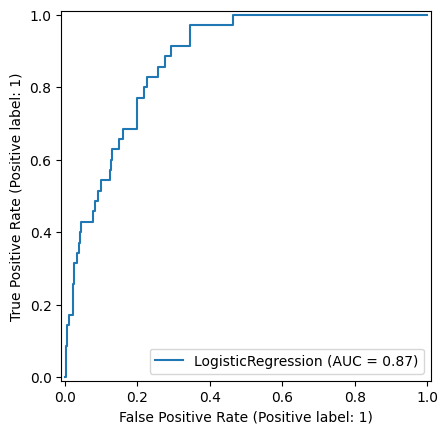

In [93]:
RocCurveDisplay.from_estimator(log_model, X_test, y_test)

**Step 23 -** Get the F1 Score for the logistic regression applied on Insurance.


$$
f_1 score = \frac{2 \times Precision \times Recall}{Precision + Recall}
$$


PS: The Kaggle submissions of the `project` will be evaluated using the weighted F1 Score. The F1 Score combines and balances Precision and Recall. More Information:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">link</a>.


In [94]:
f1_score(y_test, y_pred)

0.23076923076923078

## <font color='#BFD72F'>4.2. Regression Problems</font> <a class="anchor" id="reg"></a>
[Back to Contents](#toc)

The metrics used for regression differ from the ones used for classification. <br>The sklearn library also offers a wide range of metrics for this situation. We are going to see the most used ones.

<div>
<img src="https://drive.google.com/uc?id=11xBWEjjkF_AdJfG-laLLp_TuGJd3fCrC" width="800"/> <img name="reg_metrics.png">
</div>

To see the metrics we will first need to build a model that can be evaluated!

**Step 24 -** Create a train-test split for the boston dataset.

In [63]:
X_boston = boston.iloc[:,:-1]
y_boston = boston.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_boston,
                                                    y_boston,
                                                    test_size=0.2,
                                                    random_state=5,
                                                    shuffle=True
                                                   )

### <font color='#BFD72F'>4.2.1. Regression Model</font> <a class="anchor" id="regmodel"></a>
[Back to Contents](#toc)

**Step 25 -** Create an instance of LinearRegression named as lr with the default parameters and fit to your train data.

In [64]:
lr = LinearRegression()

**Step 26 -** Now that you have your model created, assign the predictions to `y_pred`, using the method `predict()`.

In [65]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

### <font color='#BFD72F'>4.2.2. Metrics for Regression Problems</font> <a class="anchor" id="regmodelmetrics"></a>

The **Mean Absolute Error** measures the absolute average distance between the real data and the predicted data.

$$
\text{MAE} = \frac{1}{n} \sum_{j=1}^{n} |y_j - \hat{y}_j|
$$

**Step 27 -** Get the MAE of the model you created previously.

In [66]:
mean_absolute_error(y_test, y_pred)

3.2132704958423735

Some other performance metrics used for assessing the results of regression problems are the MSE, RMSE and the R<sup>2</sup>.

The **Mean Squared Error** measures the  the average of the squares of the errors (distance between the real data and the predicted data).

$$
\text{MSE} = \frac{1}{n} \sum (Y_i - \hat{Y}_i)^2
$$


**Step 28 -** Get the MSE of the model you created previously.

In [67]:
mean_squared_error(y_test, y_pred)

20.869292183770686

The **Root Mean Squared Error** is given by the following equation.

$$
 \text{RMSE} = \sqrt{\sum_{i=1}^{n} \frac{(Y_i - \hat{Y}_i)^2}{n}}
$$

**Step 29 -** Get the RMSE of the model you created previously.

In [68]:
root_mean_squared_error(y_test, y_pred)

4.568292042303193

The **R<sup>2</sup>** is given by the following equation.

$$
R^2 = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y}_i)^2}
$$

**Step 30 -** Get the R<sup>2</sup>of the model you created previously.

In [69]:
r2_score(y_test, y_pred)

0.7334492147453091

`Note:`<br> We use the **MAE** when we want to measure the average magnitude of the errors in a set of predictions, without considering their direction.<br>
We use the **MSE** when we want the average of the squared difference between the original and predicted values in the data set.<br>
We use the **RMSE** when we want to give a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. It measures the standard deviation of residuals.<br>
We use the __R<sup>2</sup>__ when we want to measure the amount of variance in the target variable that can be explained by our model.

# <font color='#BFD72F'>5. Data Leakage</font> <a class="anchor" id="leak"></a>
[Back to Contents](#toc)

Data leakage happens when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.

<a href="https://machinelearningmastery.com/data-leakage-machine-learning/">Two good techniques</a> that you can use to minimize data leakage when developing predictive models are as follows:
- Perform data preparation within your cross validation folds.
- Hold back a validation dataset for final sanity check of your developed models.

Generally, it is good practice to use both of these techniques.

<br>
Note: More info in the <a href="https://www.kaggle.com/code/alexisbcook/data-leakage">link</a>, specially the Train-Test Contamination chapter.

<b><font size="6"> Don't forget to practice at home &#128521;</font>